# Implementation Of All Models On Cargo Data

In [36]:
#importing all
#packages
import numpy as np 
import pandas as pd
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# AR, MA, ARMA, ARIMA Models


## Data Prepartion 

In [37]:
#reading data
data = pd.read_excel(r"C:\Users\dell\Downloads\Time Series Files Day 9\Sample Demand Data.xlsx")

In [38]:
#checking data
data.head(20)

,FlightDate,Cargo_Demand
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600
5,2018-02-21,29988.53954
6,2018-02-22,24680.57908
7,2018-02-23,29792.90750
8,2018-02-24,21631.03724
9,2018-02-25,17538.75190


In [39]:
#info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [40]:
#setting index
data = data.set_index("FlightDate")

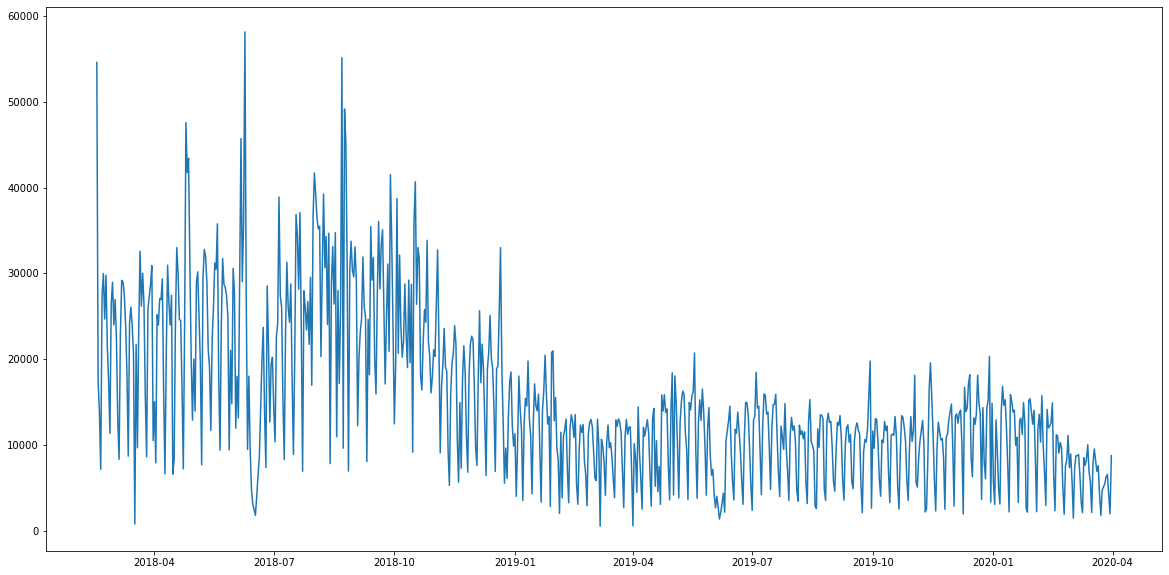

In [41]:
#plotting data
plt.figure(figsize = (20,10))
plt.plot(data)
plt.show()

### Stationerity Checking

In [42]:
#custom function for rolling stats and dickey-fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.grid()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

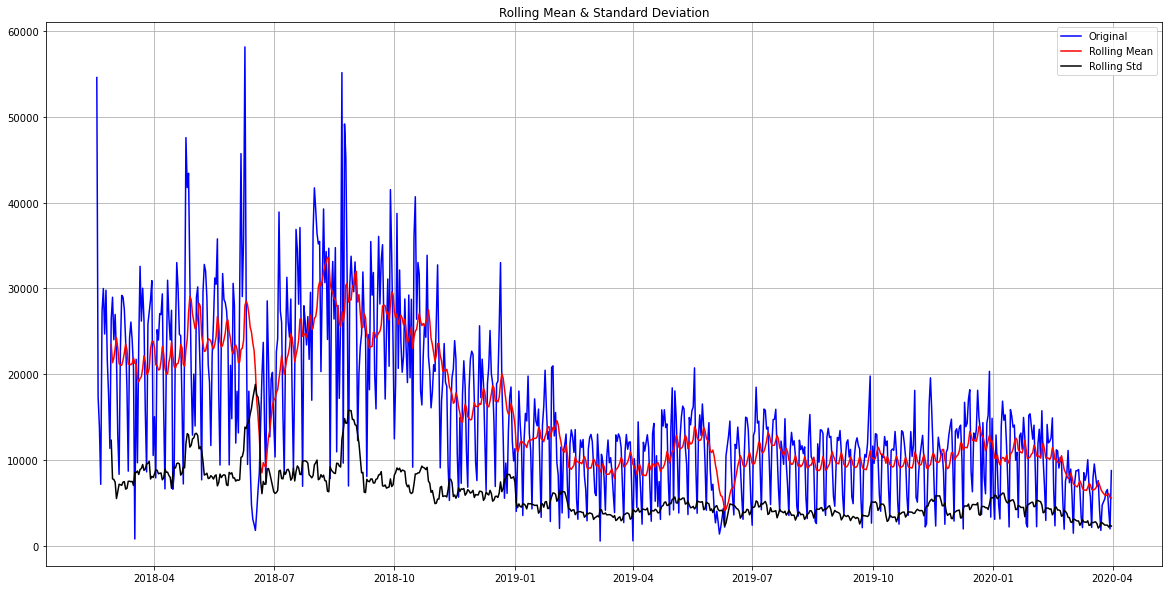

Results of Dickey-Fuller Test:
Test Statistic                  -1.392350
p-value                          0.585938
#Lags Used                      21.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64


In [43]:
#results for Stationerity
test_stationarity(data)

### Making Data Stationery

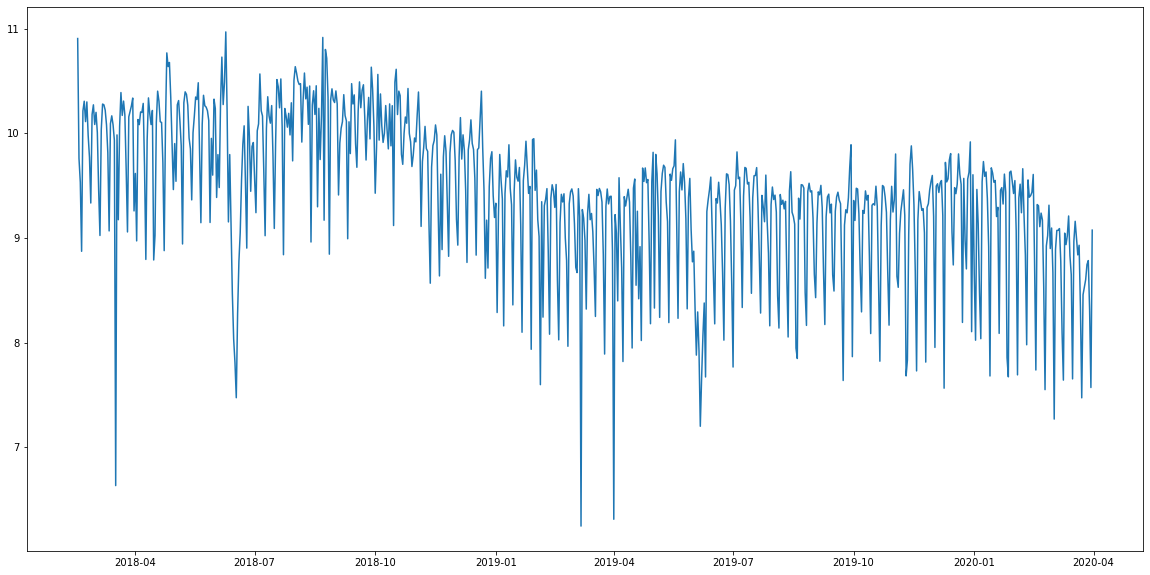

In [44]:
#taking log of data
data = np.log(data)
plt.figure(figsize = (20,10))
plt.plot(data)
plt.show()

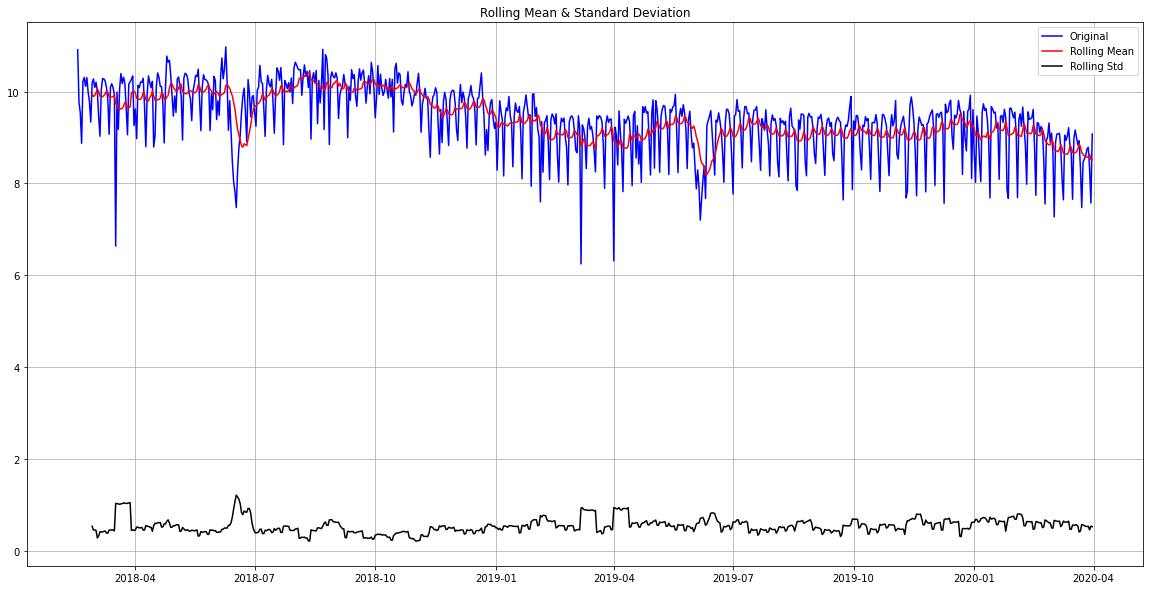

Results of Dickey-Fuller Test:
Test Statistic                  -1.810103
p-value                          0.375457
#Lags Used                      21.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64


In [45]:
#checking again
test_stationarity(data)

In [46]:
#applying moving average
moving_avg = data.rolling(12).mean()

data = data - moving_avg
data.head(12)

,Cargo_Demand
FlightDate,
2018-02-16,NaN
2018-02-17,NaN
2018-02-18,NaN
2018-02-19,NaN
2018-02-20,NaN
2018-02-21,NaN
2018-02-22,NaN
2018-02-23,NaN
2018-02-24,NaN


            Cargo_Demand
FlightDate              
2018-02-27      0.241696
2018-02-28      0.386228
2018-03-01      0.171200
2018-03-02      0.231560
2018-03-03     -0.057233


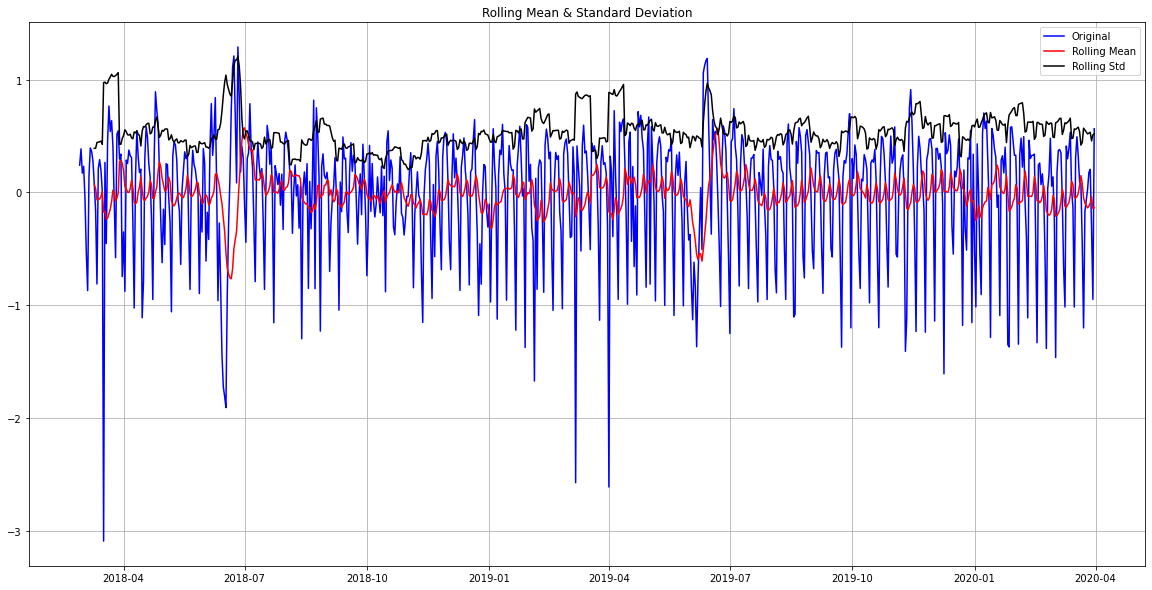

Results of Dickey-Fuller Test:
Test Statistic                -6.905027e+00
p-value                        1.253633e-09
#Lags Used                     2.000000e+01
Number of Observations Used    7.420000e+02
Critical Value (1%)           -3.439194e+00
Critical Value (5%)           -2.865443e+00
Critical Value (10%)          -2.568848e+00
dtype: float64


In [47]:
#removing nan values
data.dropna(inplace=True)
print(data.head())

#checking again
test_stationarity(data)

In [48]:
#seeing data
data

,Cargo_Demand
FlightDate,
2018-02-27,0.241696
2018-02-28,0.386228
2018-03-01,0.171200
2018-03-02,0.231560
2018-03-03,-0.057233
...,...
2020-03-27,0.177889
2020-03-28,0.204750
2020-03-29,-0.319409


In [49]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2018-02-27 to 2020-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cargo_Demand  763 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


### Decomposition

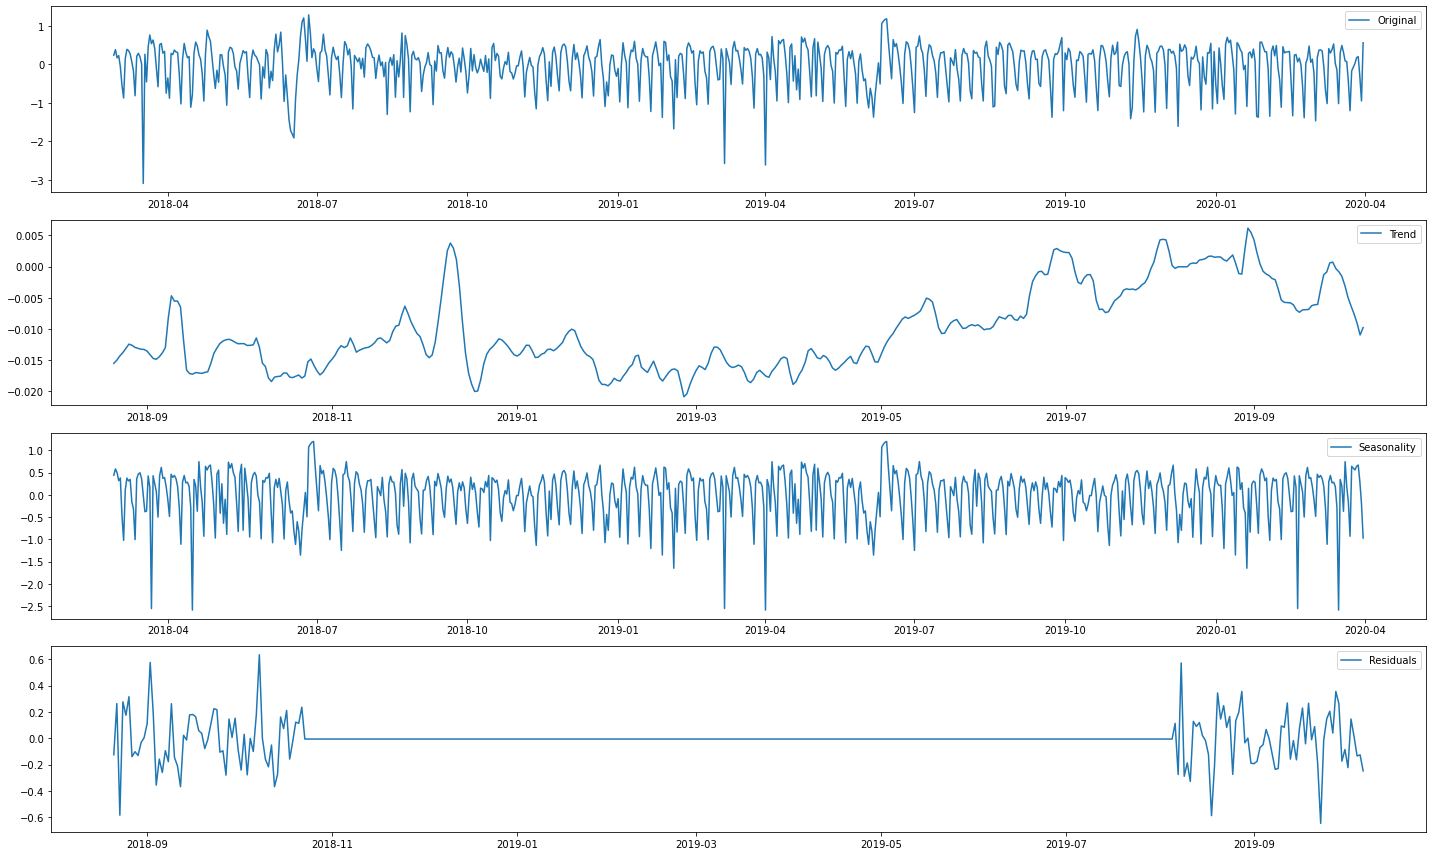

In [50]:
#apllying decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,period = 350)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### ACF AND PACF

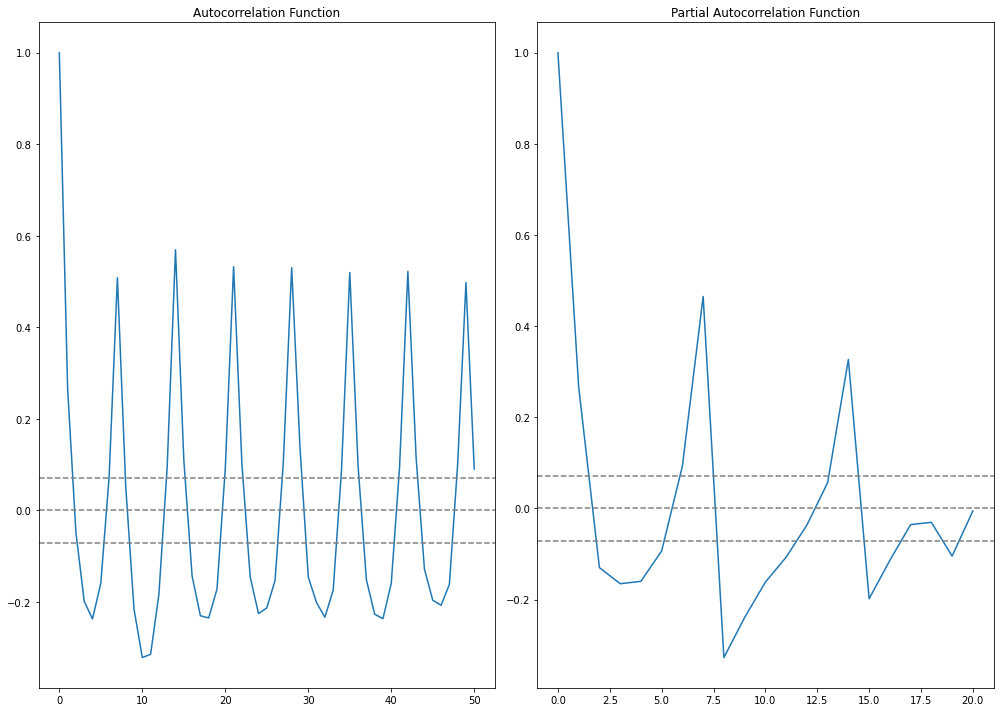

In [51]:
#for values of p and q
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data, nlags=50)
lag_pacf = pacf(data, nlags=20, method='ols')


#Plot ACF: 
plt.figure(figsize=(14,10))
plt.subplot(121) 

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Persistence Model

In [52]:
#checking correlation in terms of percentage
values = pd.DataFrame(data.values)

#creating dataframe with 1 lag value
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

#result of correlation
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.266483
t+1  0.266483  1.000000


0.39466020839541993


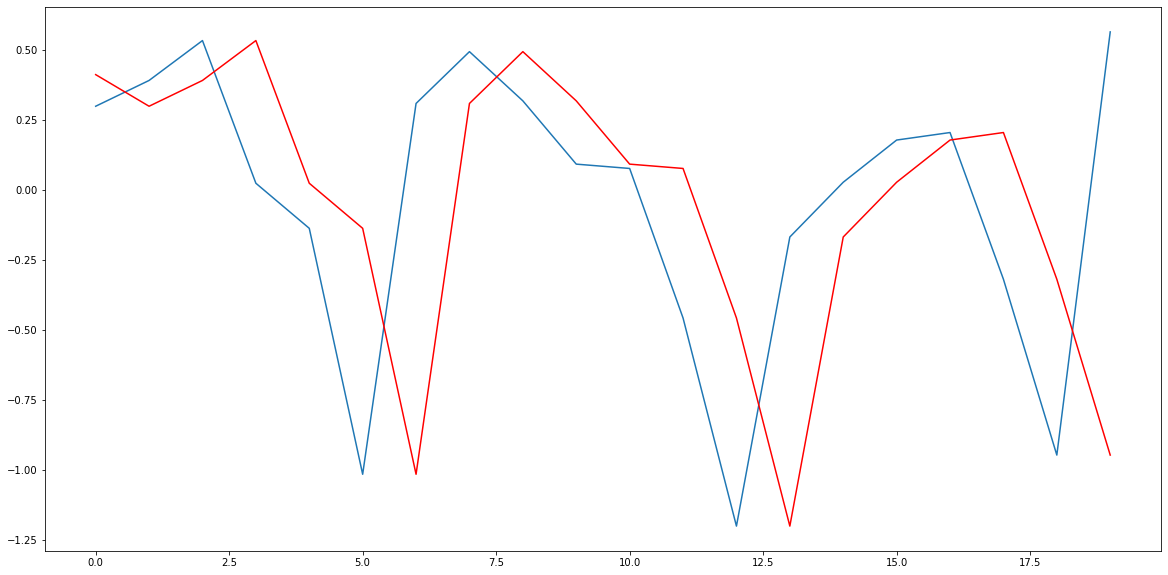

In [53]:
#importing accuracy checking methods
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#taking values from dataframe
X = dataframe.values

#spliting into test train
train, test = X[1:len(X)-20], X[len(X)-20:]

#training on X and testing on Y
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


# persistence model
def model_persistence(x):
    return(x)

# Validations

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

#mean-squared error 
test_score = mean_squared_error(test_y , predictions)

print(test_score)

# Actual Vs Predicted plot
plt.figure(figsize=(20,10))
plt.plot(test_y)
plt.plot(predictions , color = 'red')
plt.show()

# AR Model

In [54]:
#importing necessary packages
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

Coefficients: [-0.01200872  0.22442469  0.02338219 -0.0413105  -0.08127858 -0.12050257
 -0.09007854  0.49375357 -0.23350008 -0.19412741 -0.12656797 -0.09482596
 -0.03943828]
predicted=0.454055, expected=0.298664
predicted=0.441525, expected=0.390826
predicted=0.388650, expected=0.533329
predicted=0.023555, expected=0.023572
predicted=-0.488837, expected=-0.137489
predicted=-0.691371, expected=-1.016209
predicted=0.226408, expected=0.308634
predicted=0.357489, expected=0.493706
predicted=0.331332, expected=0.317935
predicted=0.245940, expected=0.091843
predicted=-0.076155, expected=0.076384
predicted=-0.468585, expected=-0.457873
predicted=-0.560276, expected=-1.201367
predicted=0.073196, expected=-0.168478
predicted=0.259552, expected=0.027143
predicted=0.265308, expected=0.177889
predicted=0.190294, expected=0.204750
predicted=-0.068845, expected=-0.319409
predicted=-0.359509, expected=-0.947628
predicted=-0.390682, expected=0.564255
Test RMSE Score: 0.332
Test R2 Score: 0.567


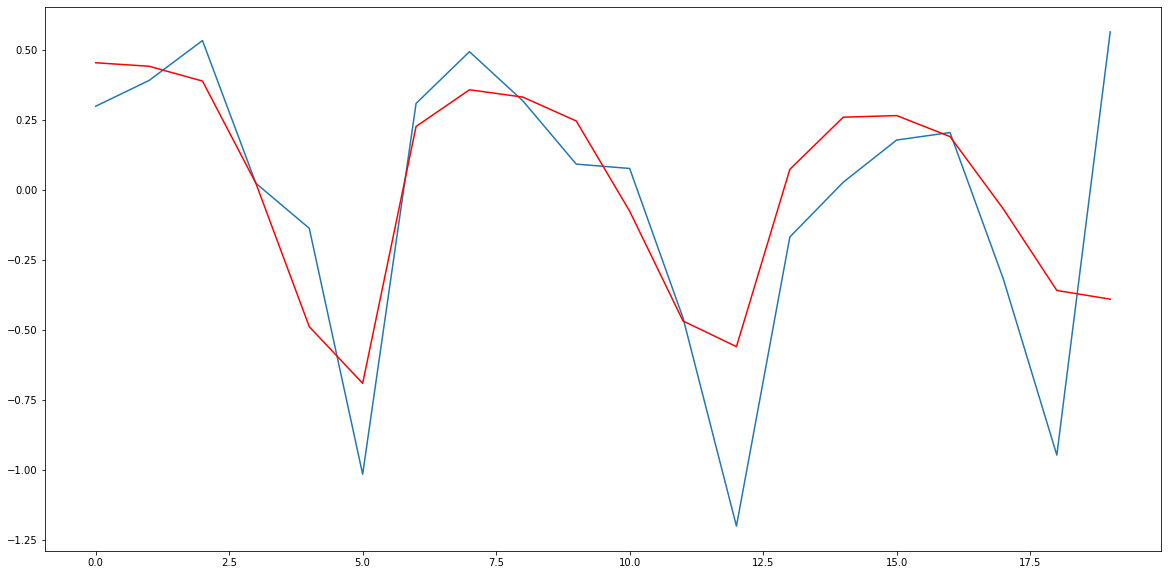

In [55]:
# split dataset
X = data.values
train, test1 = X[1:len(X)-20], X[len(X)-20:]


# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test1)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test1[i]))
rmse = sqrt(mean_squared_error(test1, predictions))
r2 = r2_score(test1, predictions)
print('Test RMSE Score: %.3f' % rmse)
print('Test R2 Score: %.3f' % r2)


# plot results
plt.figure(figsize=(20,10))
plt.plot(test1)
plt.plot(predictions, color='red')
plt.show()

# MA Model

In [56]:
#impoting packages
from statsmodels.tsa.arima.model import ARIMA
from random import random
import warnings
warnings.filterwarnings('ignore')

# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()

# make prediction
y_p_ma = model_fit.predict(len(data)-10, len(data))
print(y_p_ma)

#accuracy score prediction
test_score = r2_score(data[len(data)-11:] , y_p_ma)
print(test_score)

753    0.000203
754    0.011945
755   -0.144241
756   -0.312244
757    0.031278
758   -0.011030
759    0.044194
760    0.036081
761   -0.111537
762   -0.249016
763    0.222794
dtype: float64
0.4029302048020482


# ARMA Model

In [57]:
# fit model
model = ARIMA(data, order=(1, 0, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data)-10, len(data))
print(yhat)

#accuracy score prediction
test_score = r2_score(data[len(data)-11:] , yhat)
print(test_score)

753    0.003030
754    0.012229
755   -0.145928
756   -0.324727
757    0.019936
758   -0.006227
759    0.044092
760    0.039776
761   -0.112168
762   -0.258823
763    0.217880
dtype: float64
0.4175501374206614


# ARIMA Model

In [58]:
# fit model
model = ARIMA(data, order=(1, 2, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data)-20, len(data), typ='levels')
print(yhat)

#accuracy score prediction
test_score = sqrt(mean_squared_error(data[len(data)-21:] , yhat))
print(test_score)

test_score1 = r2_score(data[len(data)-21:] , yhat)
print(test_score1)

743    0.005758
744    0.330851
745    0.364812
746    0.493240
747    0.168147
748   -0.092381
749   -0.768464
750   -0.068170
751    0.441438
752    0.368010
753    0.155846
754    0.080445
755   -0.307147
756   -0.992386
757   -0.463041
758   -0.028921
759    0.134846
760    0.196993
761   -0.171312
762   -0.770991
763    0.134686
dtype: float64
0.19513155642558833
0.848308647492011


# Smoothing Models

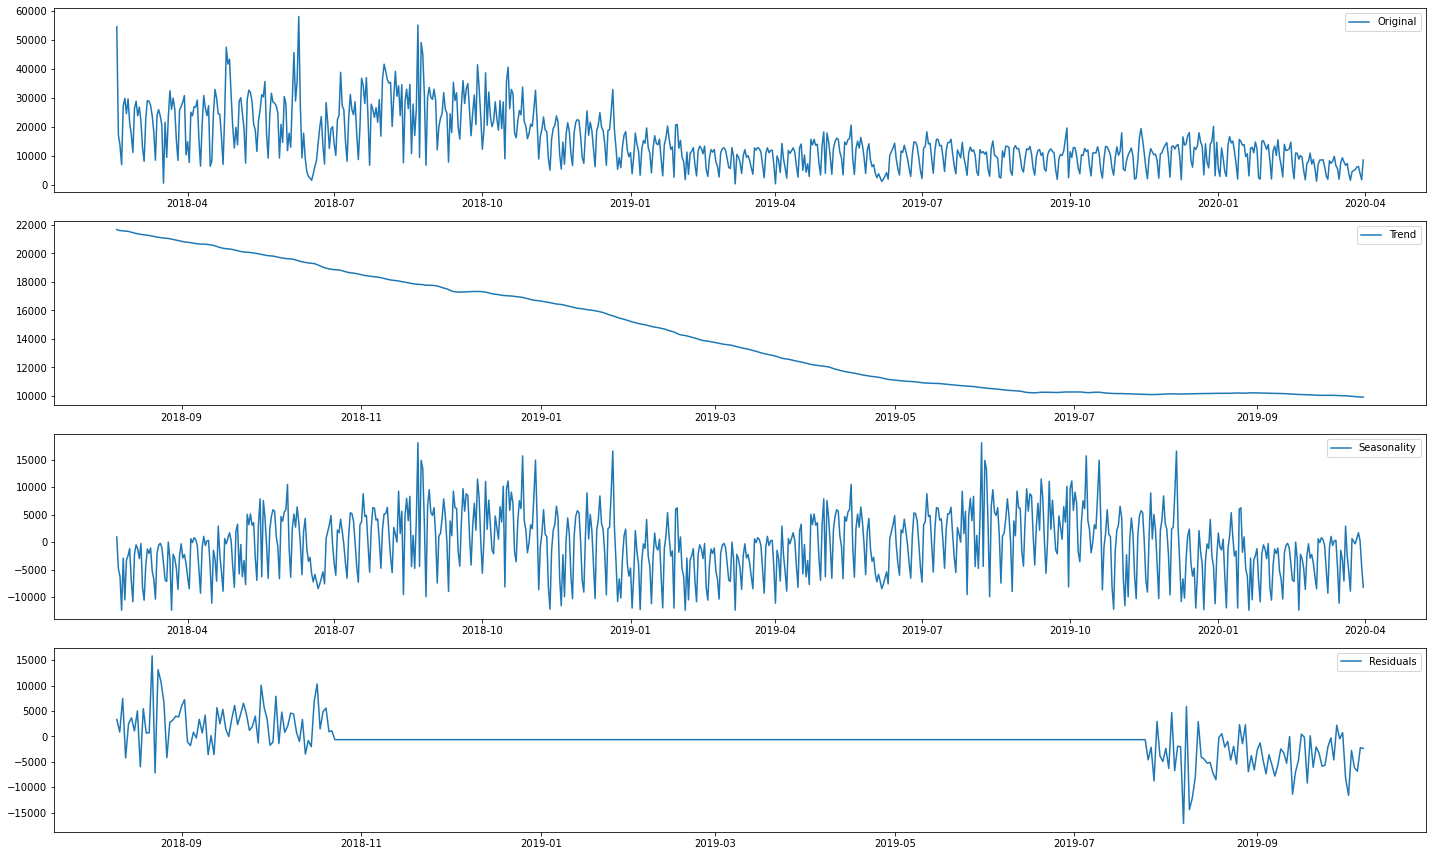

In [59]:
#data reading
data = pd.read_excel(r"C:\Users\dell\Downloads\Time Series Files Day 9\Sample Demand Data.xlsx")

data = data.set_index("FlightDate")

#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,period = 350)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [60]:
#checking correlation in terms of percentage
values = pd.DataFrame(data.values)

#creating dataframe with 1 lag value
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

#result of correlation
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.651226
t+1  0.651226  1.000000


In [61]:
#train test split
X = data.values
train, test = X[1:len(X)-20], X[len(X)-20:]

In [62]:
train

array([[17363.94526],
       [13814.45096],
       [ 7140.96584],
       [27314.866  ],
       [29988.53954],
       [24680.57908],
       [29792.9075 ],
       [21631.03724],
       [17538.7519 ],
       [11331.11738],
       [26433.95596],
       [28972.91442],
       [24006.56932],
       [26961.5483 ],
       [22201.1359 ],
       [12844.66304],
       [ 8307.28064],
       [22883.13918],
       [29189.62808],
       [28977.91788],
       [27540.8382 ],
       [23911.69384],
       [18341.47528],
       [ 8677.13122],
       [24204.42638],
       [26078.0795 ],
       [23929.06882],
       [20652.66218],
       [  760.     ],
       [21731.57642],
       [ 9657.53146],
       [23547.00924],
       [32581.52324],
       [26183.19732],
       [30027.4917 ],
       [26308.17116],
       [15630.65612],
       [ 8592.3114 ],
       [25832.99908],
       [27282.9214 ],
       [28688.18164],
       [30909.62146],
       [10505.93024],
       [15031.23252],
       [ 7887.7885 ],
       [25

# Simple Exponential Smoothing

For Basic Implementation

In [63]:
#importing packages of all 3 models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#fitting Simple Exp. Sm. Model for train
fit2 = SimpleExpSmoothing(train).fit(smoothing_level=0.6,optimized=False)

#forcesting for test
y_p_SES = fit2.forecast(len(test))

#printing predicted
print(y_p_SES)

#r2_score for Accuracy
test_score_1 = r2_score(data[len(data)-20:] , y_p_SES)
print(test_score_1)

[6382.48318827 6382.48318827 6382.48318827 6382.48318827 6382.48318827
 6382.48318827 6382.48318827 6382.48318827 6382.48318827 6382.48318827
 6382.48318827 6382.48318827 6382.48318827 6382.48318827 6382.48318827
 6382.48318827 6382.48318827 6382.48318827 6382.48318827 6382.48318827]
-0.005056911730138225


# Double Exponential Smoothing

For Basic Implementation

In [64]:
#fitting Double Exp. Sm. Model for train with
#both alpha and beta
fit1 = Holt(train).fit(smoothing_level = 0.6,smoothing_slope = 0.1)

#forcesting for test
y_p_HEP = fit1.forecast(len(test))

#printing predicted
print(y_p_HEP)

#r2_score for Accuracy
test_score_2 = r2_score(data[len(data)-20:] , y_p_HEP)
print(test_score_2)

[6067.60539166 5976.864481   5886.12357034 5795.38265968 5704.64174902
 5613.90083837 5523.15992771 5432.41901705 5341.67810639 5250.93719573
 5160.19628507 5069.45537441 4978.71446375 4887.97355309 4797.23264243
 4706.49173177 4615.75082111 4525.00991046 4434.2689998  4343.52808914]
-0.05493125304698143


# Triple Exponential Smoothing

For Prediction

In [65]:
#fitting Triple Exp. Sm. Model for train with
#alpha, beta and gamma values
fit = ExponentialSmoothing((train) ,seasonal_periods=84 ,trend='add', seasonal='mul').fit()

#forcesting for test
y_p_ES = fit.forecast(len(test))

#printing predicted
print(y_p_ES)

#r2_score for Accuracy
test_score_3 = sqrt(mean_squared_error(data[len(data)-20:] , y_p_ES))
print(test_score_3)

test_score_4 = r2_score(data[len(data)-20:] , y_p_ES)
print(test_score_4)

[7823.43539685 7655.63267408 7867.60490075 6456.67853554 6037.85261554
 3632.6586549  6502.45999588 7659.52630246 7075.91457612 7917.18509468
 7320.30408349 6377.00799076 2567.86776655 7027.61898333 7830.02411475
 7063.92152912 7761.89885825 5816.48890405 5117.12288792 2575.37755192]
2059.5890701242424
0.25503231744556454


# Comparing Prediction with Actual Data

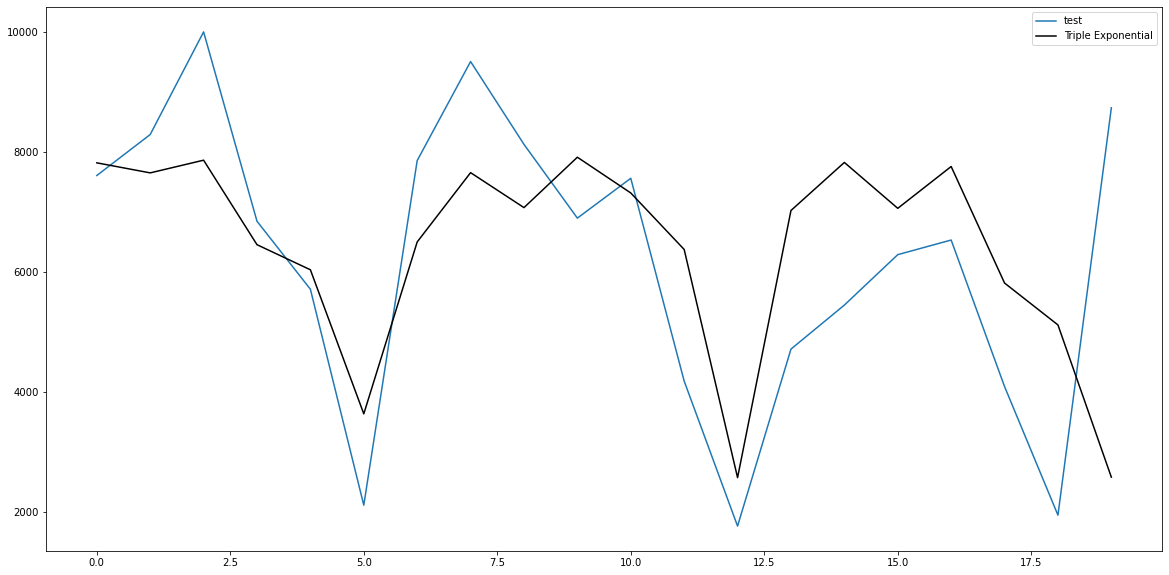

In [66]:
#plotting graph
plt.figure(figsize=(20,10))
plt.plot(test,label='test')
plt.plot(y_p_ES, color='black',label='Triple Exponential')
plt.legend(loc='best')
plt.show()

# FBProphect

In [1]:
# uploading file in google collab
from google.colab import files
uploaded = files.upload()

Saving Sample Demand Data.xlsx to Sample Demand Data.xlsx


In [4]:
#reading data
df=pd.read_excel('Sample Demand Data.xlsx')

In [5]:
df.head()

,FlightDate,Cargo_Demand
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [7]:
#changing column name to ds and y
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600


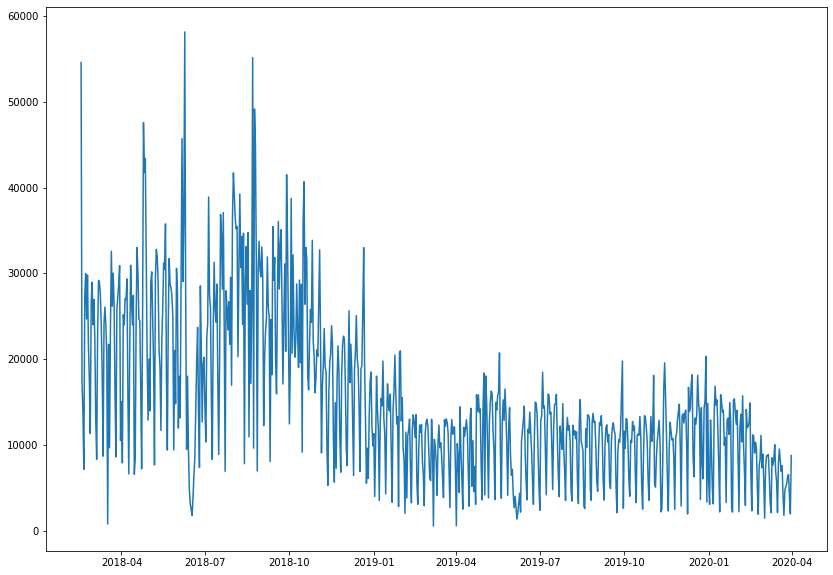

In [8]:
#plot of data
plt.figure(figsize=(14,10))
plt.plot(df.set_index(['ds']))

In [10]:
#package import
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Initialize the Model
model=Prophet()

In [12]:
df.columns

Index(['ds', 'y'], dtype='object')

In [13]:
df.dropna(axis=0,inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [14]:
df

,ds,y
0,2018-02-16,54609.03842
1,2018-02-17,17363.94526
2,2018-02-18,13814.45096
3,2018-02-19,7140.96584
4,2018-02-20,27314.86600
...,...,...
769,2020-03-27,6290.48158
770,2020-03-28,6534.48634
771,2020-03-29,4088.32328
772,2020-03-30,1941.32808


In [15]:
#model fit
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [17]:
future_dates.tail()

,ds
1134,2021-03-27
1135,2021-03-28
1136,2021-03-29
1137,2021-03-30
1138,2021-03-31


In [18]:
#prediction on future_dates
prediction=model.predict(future_dates)

In [19]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-16,28177.871631,22146.953209,34982.296868,28177.871631,28177.871631,482.675824,482.675824,482.675824,4184.393747,4184.393747,4184.393747,-3701.717924,-3701.717924,-3701.717924,0.0,0.0,0.0,28660.547455
1,2018-02-17,28140.006257,19181.210653,32854.496434,28140.006257,28140.006257,-2215.009844,-2215.009844,-2215.009844,1638.852671,1638.852671,1638.852671,-3853.862515,-3853.862515,-3853.862515,0.0,0.0,0.0,25924.996413
2,2018-02-18,28102.140882,14593.432192,27666.440764,28102.140882,28102.140882,-7058.374116,-7058.374116,-7058.374116,-3055.227836,-3055.227836,-3055.227836,-4003.146280,-4003.146280,-4003.146280,0.0,0.0,0.0,21043.766766
3,2018-02-19,28064.275508,7995.436177,21151.513893,28064.275508,28064.275508,-13318.278655,-13318.278655,-13318.278655,-9169.482724,-9169.482724,-9169.482724,-4148.795932,-4148.795932,-4148.795932,0.0,0.0,0.0,14745.996853
4,2018-02-20,28026.410133,18222.294801,32200.411139,28026.410133,28026.410133,-3153.153508,-3153.153508,-3153.153508,1136.881859,1136.881859,1136.881859,-4290.035366,-4290.035366,-4290.035366,0.0,0.0,0.0,24873.256626


In [20]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1134,2021-03-27,24653.996979,12999.508598,28290.940781,21124.332195,28115.467179,-3556.670836,-3556.670836,-3556.670836,1638.852671,1638.852671,1638.852671,-5195.523507,-5195.523507,-5195.523507,0.0,0.0,0.0,21097.326143
1135,2021-03-28,24685.631971,8316.197672,23727.573861,21144.885177,28154.776415,-8214.812419,-8214.812419,-8214.812419,-3055.227836,-3055.227836,-3055.227836,-5159.584583,-5159.584583,-5159.584583,0.0,0.0,0.0,16470.819552
1136,2021-03-29,24717.266962,2730.467286,18073.040760,21165.438159,28202.411912,-14286.341639,-14286.341639,-14286.341639,-9169.482724,-9169.482724,-9169.482724,-5116.858916,-5116.858916,-5116.858916,0.0,0.0,0.0,10430.925323
1137,2021-03-30,24748.901953,13411.175316,28466.402092,21181.762479,28250.047409,-3929.260411,-3929.260411,-3929.260411,1136.881859,1136.881859,1136.881859,-5066.142269,-5066.142269,-5066.142269,0.0,0.0,0.0,20819.641543
1138,2021-03-31,24780.536945,15128.527463,30895.938197,21188.264752,28295.954292,-1739.201935,-1739.201935,-1739.201935,3267.063780,3267.063780,3267.063780,-5006.265715,-5006.265715,-5006.265715,0.0,0.0,0.0,23041.335010


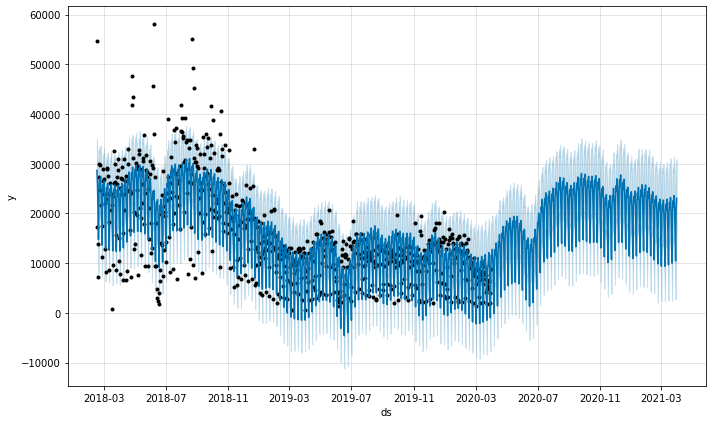

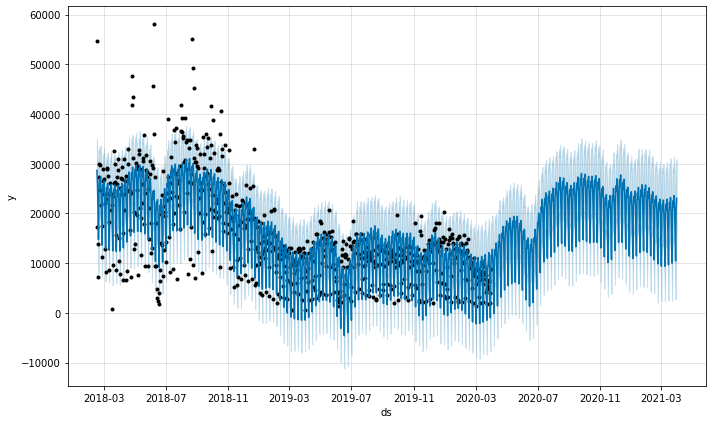

In [21]:
### plot the predicted projection
model.plot(prediction)

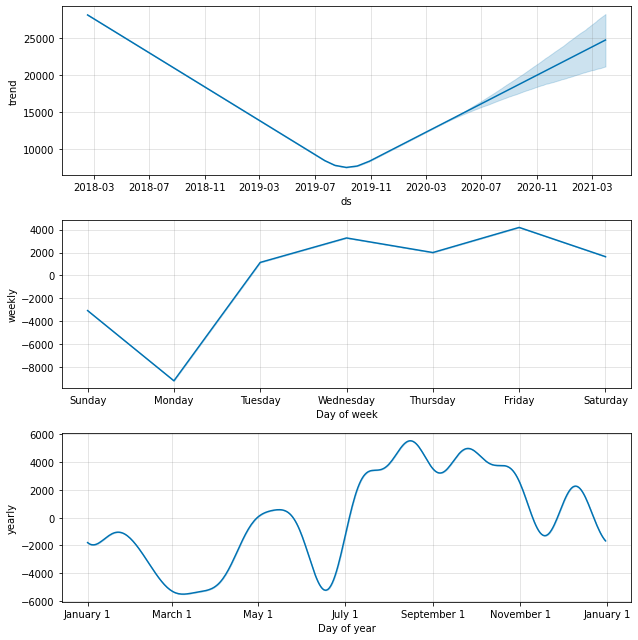

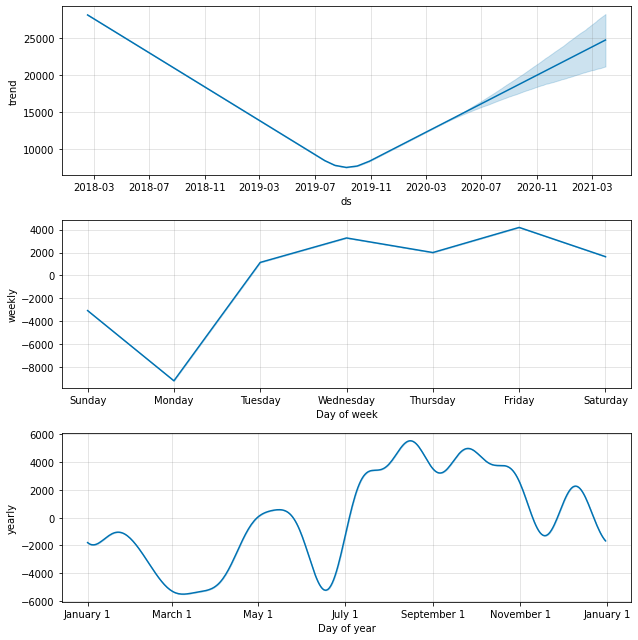

In [22]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [134]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon = "45 days")
df_cv.head()

INFO:fbprophet:Making 17 forecasts with cutoffs between 2019-02-20 00:00:00 and 2020-02-15 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-21,8835.091309,692.512653,16939.740197,11445.78260,2019-02-20
1,2019-02-22,11605.667995,3962.664587,19804.762409,12377.27328,2019-02-20
2,2019-02-23,7352.924271,-710.245022,14974.795294,8121.46490,2019-02-20
3,2019-02-24,1673.372654,-6030.064048,9715.916723,6539.66200,2019-02-20
4,2019-02-25,-7136.344654,-15546.247076,1119.926019,2879.46902,2019-02-20


In [135]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
759,2020-03-27,13478.457561,6410.153080,20038.082349,6290.48158,2020-02-15
760,2020-03-28,10865.927491,3924.265696,17346.553610,6534.48634,2020-02-15
761,2020-03-29,6110.046360,-901.832906,12515.499377,4088.32328,2020-02-15
762,2020-03-30,-159.793058,-7129.536542,6521.200009,1941.32808,2020-02-15
763,2020-03-31,10492.701782,3600.739479,16930.433105,8742.60288,2020-02-15


In [136]:
#performance matrix
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days 12:00:00,1.996376e+07,4468.082495,3613.485283,0.549827,0.258051,0.894737
1,5 days 00:00:00,1.974422e+07,4443.447133,3507.829714,0.586725,0.230727,0.896199
2,5 days 12:00:00,2.117902e+07,4602.066409,3632.349704,0.552272,0.246646,0.881579
3,6 days 00:00:00,2.266864e+07,4761.159252,3853.446634,0.580466,0.364938,0.869883
4,6 days 12:00:00,2.400298e+07,4899.283742,3965.308271,0.564913,0.364938,0.868421


In [137]:
df_p.head(50)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days 12:00:00,1.996376e+07,4468.082495,3613.485283,0.549827,0.258051,0.894737
1,5 days 00:00:00,1.974422e+07,4443.447133,3507.829714,0.586725,0.230727,0.896199
2,5 days 12:00:00,2.117902e+07,4602.066409,3632.349704,0.552272,0.246646,0.881579
3,6 days 00:00:00,2.266864e+07,4761.159252,3853.446634,0.580466,0.364938,0.869883
4,6 days 12:00:00,2.400298e+07,4899.283742,3965.308271,0.564913,0.364938,0.868421
5,7 days 00:00:00,2.442504e+07,4942.169862,3871.081449,0.529142,0.302170,0.842105
6,7 days 12:00:00,2.868937e+07,5356.245703,4214.138670,0.566835,0.352229,0.789474
7,8 days 00:00:00,2.761386e+07,5254.889607,4046.450970,0.529926,0.302170,0.789474
8,8 days 12:00:00,2.767640e+07,5260.836313,4087.176921,0.530171,0.319386,0.789474
9,9 days 00:00:00,2.475243e+07,4975.181889,3883.344180,0.511619,0.286200,0.805556


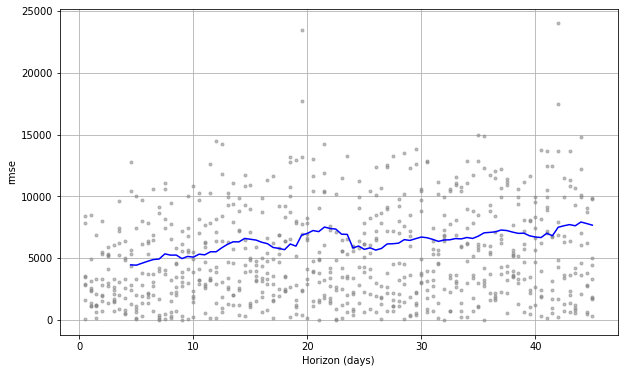

In [138]:
#error plotting
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [139]:
#iloc for taking 1 column
df_cv = df_cv.iloc[:,1]
df_cv

0       8835.091309
1      11605.667995
2       7352.924271
3       1673.372654
4      -7136.344654
           ...     
759    13478.457561
760    10865.927491
761     6110.046360
762     -159.793058
763    10492.701782
Name: yhat, Length: 764, dtype: float64

In [83]:

df

0      54609.03842
1      17363.94526
2      13814.45096
3       7140.96584
4      27314.86600
          ...     
769     6290.48158
770     6534.48634
771     4088.32328
772     1941.32808
773     8742.60288
Name: y, Length: 774, dtype: float64

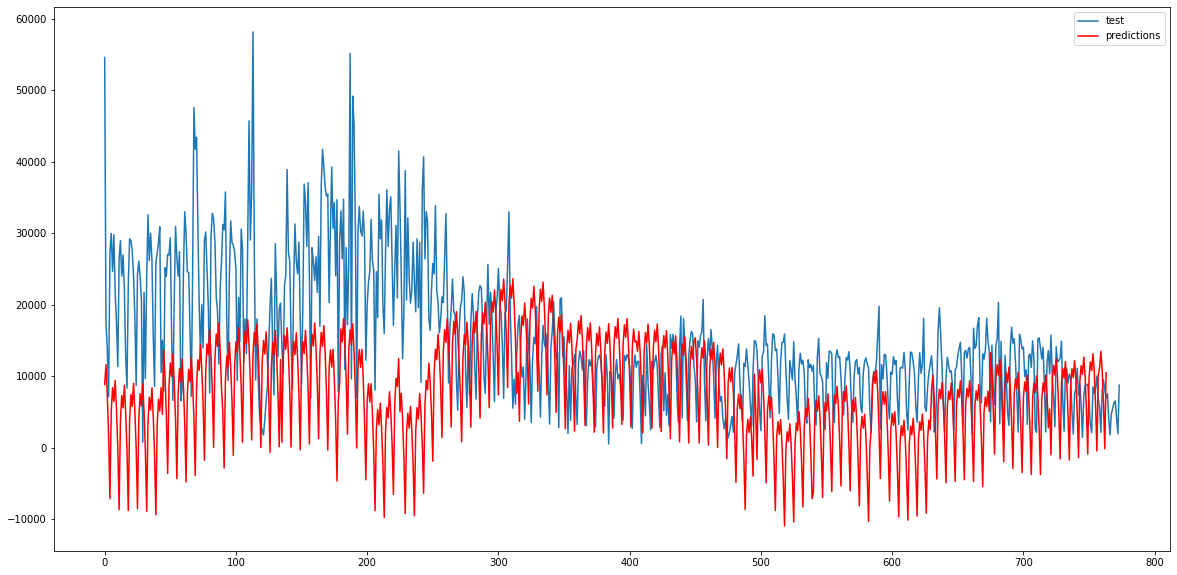

In [140]:
#plotting prediction and test
plt.figure(figsize=(20,10))
plt.plot(df,label='test')
plt.plot(df_cv, color='red',label='predictions')
plt.legend(loc='best')
plt.show()

# Linear Regression

In [93]:
#data reading
data = pd.read_excel(r"C:\Users\dell\Downloads\Time Series Files Day 9\Sample Demand Data.xlsx")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FlightDate    774 non-null    datetime64[ns]
 1   Cargo_Demand  774 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.2 KB


In [94]:
#taking year, month and week from datetime column
data["Year"] = data["FlightDate"].dt.year
data["Month"] = data["FlightDate"].dt.month
data["Week"] = data["FlightDate"].dt.weekday

In [95]:
data

,FlightDate,Cargo_Demand,Year,Month,Week
0,2018-02-16,54609.03842,2018,2,4
1,2018-02-17,17363.94526,2018,2,5
2,2018-02-18,13814.45096,2018,2,6
3,2018-02-19,7140.96584,2018,2,0
4,2018-02-20,27314.86600,2018,2,1
...,...,...,...,...,...
769,2020-03-27,6290.48158,2020,3,4
770,2020-03-28,6534.48634,2020,3,5
771,2020-03-29,4088.32328,2020,3,6
772,2020-03-30,1941.32808,2020,3,0


In [96]:
#setting index
data = data.set_index("FlightDate")

In [97]:
data

,Cargo_Demand,Year,Month,Week
FlightDate,,,,
2018-02-16,54609.03842,2018,2,4
2018-02-17,17363.94526,2018,2,5
2018-02-18,13814.45096,2018,2,6
2018-02-19,7140.96584,2018,2,0
2018-02-20,27314.86600,2018,2,1
...,...,...,...,...
2020-03-27,6290.48158,2020,3,4
2020-03-28,6534.48634,2020,3,5
2020-03-29,4088.32328,2020,3,6


In [98]:
#creating dummies
data = pd.get_dummies(data, columns=['Year','Month','Week'],drop_first=True)

In [99]:
data

,Cargo_Demand,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,,
2018-02-16,54609.03842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-02-17,17363.94526,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,13814.45096,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,7140.96584,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,27314.86600,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,6290.48158,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-03-28,6534.48634,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-03-29,4088.32328,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [100]:
#for dependent and independent variable
X=data.drop('Cargo_Demand',axis=1)
y=data.Cargo_Demand

In [101]:
#taking log of Cargo_Demand column
y=np.log(y)

In [102]:
X

,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,
2018-02-16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-02-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-03-28,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-03-29,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [103]:
y

FlightDate
2018-02-16    10.907955
2018-02-17     9.762151
2018-02-18     9.533470
2018-02-19     8.873603
2018-02-20    10.215186
                ...    
2020-03-27     8.746793
2020-03-28     8.784849
2020-03-29     8.315890
2020-03-30     7.571128
2020-03-31     9.075963
Name: Cargo_Demand, Length: 774, dtype: float64

In [109]:
#train and test split
train_X, test_X = X[1:len(X)-80], X[len(X)-80:]
train_y, test_y = y[1:len(X)-80], y[len(X)-80:]

In [110]:
train_X

,Year_2019,Year_2020,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6
FlightDate,,,,,,,,,,,,,,,,,,,
2018-02-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2018-02-18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-02-19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-20,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2018-02-21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
test_y

FlightDate
2020-01-11    9.379392
2020-01-12    8.916502
2020-01-13    7.681405
2020-01-14    9.671568
2020-01-15    9.622800
                ...   
2020-03-27    8.746793
2020-03-28    8.784849
2020-03-29    8.315890
2020-03-30    7.571128
2020-03-31    9.075963
Name: Cargo_Demand, Length: 80, dtype: float64

In [112]:
#linear regression implementation
from sklearn import linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression() 
reg.fit(train_X, train_y) 
pre_y=reg.predict(test_X)

In [113]:
pre_y

array([9.11936983, 8.76112393, 8.04506767, 9.14019628, 9.20224759,
       9.12165937, 9.28755382, 9.11936983, 8.76112393, 8.04506767,
       9.14019628, 9.20224759, 9.12165937, 9.28755382, 9.11936983,
       8.76112393, 8.04506767, 9.14019628, 9.20224759, 9.12165937,
       9.28755382, 8.85939509, 8.50114918, 7.78509293, 8.88022153,
       8.94227285, 8.86168463, 9.02757907, 8.85939509, 8.50114918,
       7.78509293, 8.88022153, 8.94227285, 8.86168463, 9.02757907,
       8.85939509, 8.50114918, 7.78509293, 8.88022153, 8.94227285,
       8.86168463, 9.02757907, 8.85939509, 8.50114918, 7.78509293,
       8.88022153, 8.94227285, 8.86168463, 9.02757907, 8.85939509,
       8.43305903, 7.71700278, 8.81213138, 8.8741827 , 8.79359448,
       8.95948892, 8.79130493, 8.43305903, 7.71700278, 8.81213138,
       8.8741827 , 8.79359448, 8.95948892, 8.79130493, 8.43305903,
       7.71700278, 8.81213138, 8.8741827 , 8.79359448, 8.95948892,
       8.79130493, 8.43305903, 7.71700278, 8.81213138, 8.79359

In [114]:
#mean-squared error
print("Mean squared error:",mean_squared_error(test_y,pre_y))

Mean squared error: 0.11732671778572563


In [115]:
#r2-score
r2_score(test_y, pre_y)

0.7090823588243181

In [116]:
#for plotting
test_y1=test_y.reset_index()
test_y1=test_y1.iloc[:,1]

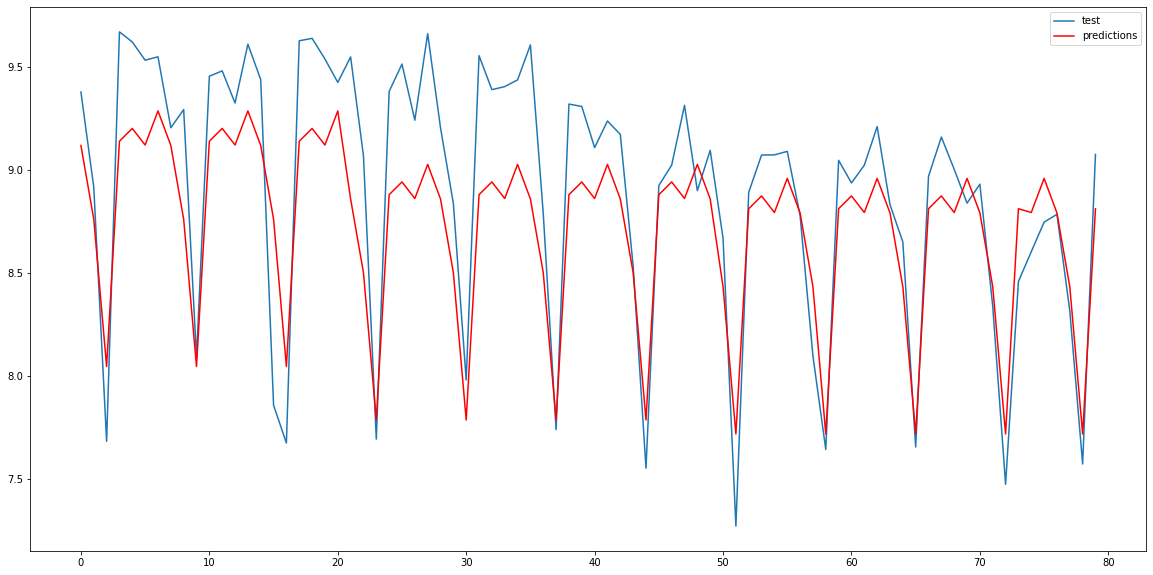

In [117]:
#plotting graph
plt.figure(figsize=(20,10))
plt.plot(test_y1,label='test')
plt.plot(pre_y, color='red',label='predictions')
plt.legend(loc='best')
plt.show()